In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [21]:
import plotly.express as px

In [22]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [23]:
px.histogram(df, "age", title='Patients age', template ='simple_white')

In [24]:
df_anaemia = df['anaemia'].value_counts().reset_index()
df_anaemia.columns = ['anaemia', 'count']
px.bar(df_anaemia, x='anaemia', y="count", title='Anaemia bar chart')


In [25]:
df_diabetes = df['diabetes'].value_counts().reset_index()
df_diabetes.columns = ['diabetes', 'count']
px.bar(df_diabetes, x='diabetes', y="count", title='Diabetes bar chart')

In [26]:
df_smoking = df['smoking'].value_counts().reset_index()
df_smoking.columns = ['smoking', 'count']
px.bar(df_smoking, x='smoking', y="count", title='Smoking bar chart')

In [27]:
px.histogram(df, "ejection_fraction", title='Ejection_fraction distribution',template ='simple_white')

In [28]:
import seaborn as sns

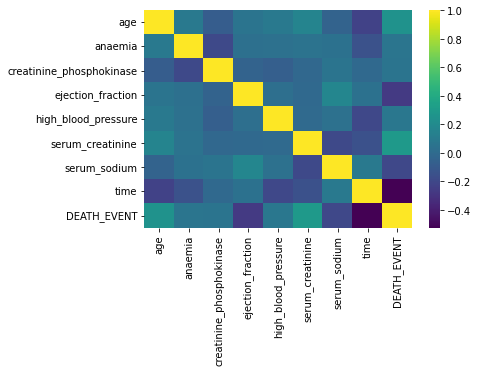

In [29]:
for col in df.columns:
    if abs(df[col].corr(df.DEATH_EVENT)) < 0.05:
        df = df.drop([col], axis=1)

sns.heatmap(df.corr(),cmap='viridis')

diabetes, platelets, sex,	time are droped in above step 


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,average_precision_score,balanced_accuracy_score,precision_score

110

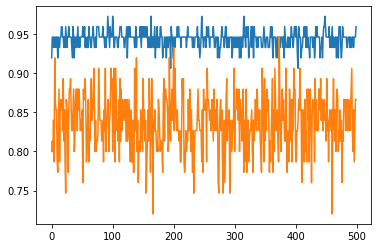

In [31]:
Score=[]
forest = RandomForestClassifier(random_state=0)
for a in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(df.drop(['DEATH_EVENT'],axis=1),df['DEATH_EVENT'],test_size=0.25,random_state=a)
    forest.fit(X_train,y_train)
    pred = forest.predict(X_test)
    b = accuracy_score(y_test,pred)
    Score.append(b) 

X_train,X_test,y_train,y_test = train_test_split(df.drop(['DEATH_EVENT'],axis=1),df['DEATH_EVENT'],test_size=0.25,random_state=Score.index(np.array(Score).max()))

Score1=[]
X_train,X_test,y_train,y_test = train_test_split(df.drop(['DEATH_EVENT'],axis=1),df['DEATH_EVENT'],test_size=0.25,random_state=476)
for a in range(1000):
    forest = RandomForestClassifier(random_state=a)
    forest.fit(X_train,y_train)
    pred = forest.predict(X_test)
    b = accuracy_score(y_test,pred)
    Score1.append(b) 

np.array(Score).max()

plt.plot(range(500),Score1[500:])

plt.plot(range(500),Score[500:])

np.array(Score1).max()

np.array(Score).max()

Score1.index(np.array(Score1).max())

In [40]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(random_state=Score1.index(np.array(Score1).max()))
nn.fit(X_train,y_train)
prediction4 = nn.predict(X_test)
print('                    Neural Network')
print(classification_report(y_test,prediction4))
nn.fit(X_train,y_train)

                    Neural Network
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        52
           1       0.89      0.74      0.81        23

    accuracy                           0.89        75
   macro avg       0.89      0.85      0.87        75
weighted avg       0.89      0.89      0.89        75



MLPClassifier(random_state=110)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=Score1.index(np.array(Score1).max()))
dtree.fit(X_train,y_train)
prediction3 = dtree.predict(X_test)
print('                    Decision Tree Classifier')
print(classification_report(y_test,prediction3))
dtree.fit(X_train,y_train)

                    Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        52
           1       0.77      0.87      0.82        23

    accuracy                           0.88        75
   macro avg       0.85      0.88      0.86        75
weighted avg       0.89      0.88      0.88        75



DecisionTreeClassifier(random_state=110)

In [42]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=Score1.index(np.array(Score1).max()))
log.fit(X_train,y_train)
prediction = log.predict(X_test)
print('                    Logistic Regression')
print(classification_report(y_test,prediction))
log.fit(X_train,y_train)

                    Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.90      0.83      0.86        23

    accuracy                           0.92        75
   macro avg       0.92      0.89      0.90        75
weighted avg       0.92      0.92      0.92        75



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=110)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction2 = knn.predict(X_test)
print('                    K Nearest Neighbor Classifier')
print(classification_report(y_test,prediction2))
knn.fit(X_train,y_train)

                    K Nearest Neighbor Classifier
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        52
           1       0.74      0.61      0.67        23

    accuracy                           0.81        75
   macro avg       0.79      0.76      0.77        75
weighted avg       0.81      0.81      0.81        75



KNeighborsClassifier()

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=Score1.index(np.array(Score1).max()))
forest.fit(X_train,y_train)
prediction1 = forest.predict(X_test)
print('                    Random Forest Classifier')
print(classification_report(y_test,prediction1))
forest.fit(X_train,y_train)

                    Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



RandomForestClassifier(random_state=110)

In [46]:
models = pd.Series(['Random Forest Classifier','Logistic Regression','Neural Network','Decision Tree Classifier','K Nearest Neighbor'])

Accuracy = pd.Series([accuracy_score(y_test,prediction1),accuracy_score(y_test,prediction),accuracy_score(y_test,prediction4),accuracy_score(y_test,prediction3),accuracy_score(y_test,prediction2)])

Leaderboard = pd.DataFrame({'Models':models,'Accuracy':Accuracy})


Leaderboard


,Models,Accuracy
0,Random Forest Classifier,0.973333
1,Logistic Regression,0.920000
2,Neural Network,0.893333
3,Decision Tree Classifier,0.880000
4,K Nearest Neighbor,0.813333
